In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
import scipy.optimize as opt
from Common_functions import *
from tqdm import tqdm
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

In [2]:
path = '/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/Microlensing_Harvard/'

In [3]:
data, labels, IDs = select_points_roman(path,
                                        n_days = 5, 
                                        thresh_mag = 1.03,
                                        cadence = 15/(60*24))

9000it [00:00, 68255.19it/s]


In [4]:
cadence = 15/(60*24)
mjd_t = np.arange(len(data[0])) * cadence

In [5]:
classes = ['Single Lens', 'Stellar Binary Lens', 'Planetary System Lens']
class_ = 1
ind_selected = 13
ind = np.where(labels==class_)[0][ind_selected]

Text(0.5, 1.0, 'An example of a Stellar Binary Lens event')

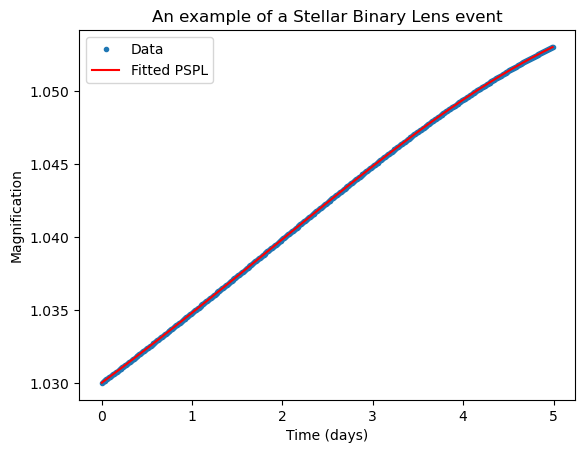

In [6]:
plt.plot(mjd_t, data[ind], '.', label = 'Data')


params_fit, fun_ = fit_PSPL(mjd_t, data[ind])
plt.plot(mjd_t, fun(mjd_t, *list(params_fit['x'])), 'r-', label = 'Fitted PSPL')

plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Magnification')
plt.title('An example of a %s event'%classes[class_])

In [7]:
all_params = np.zeros((len(data), 5))
for d, dat in tqdm(enumerate(data)):
    all_fit_res, chi2 = fit_PSPL(mjd_t, dat)
    all_params[d, :4]=all_fit_res['x']
    all_params[d, -1] = chi2

8754it [08:16, 17.63it/s]


/var/folders/6f/k2kn3hn52ws4kc_w0_zqfpy40000gp/T/ipykernel_13219/927394196.py:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


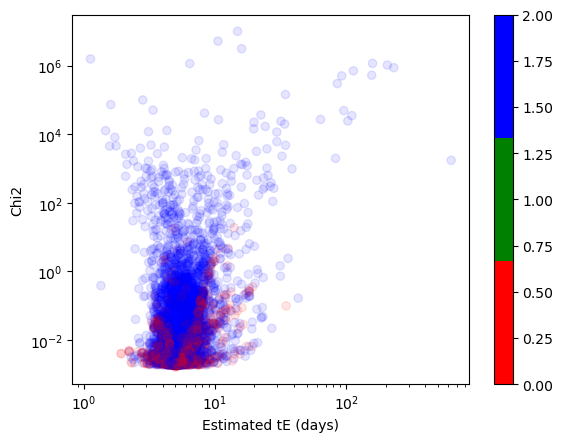

In [8]:
colormap = ListedColormap(['red', 'green', 'blue'])
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=np.min(labels), 
            vmax=np.max(labels))
colors = colormap(labels)
plt.scatter(all_params[:, 1], all_params[:, -1], c=colors, alpha=0.1)
plt.colorbar(sm)
plt.ylabel('Chi2')
plt.xlabel('Estimated tE (days)')
plt.yscale('log')
plt.xscale('log')


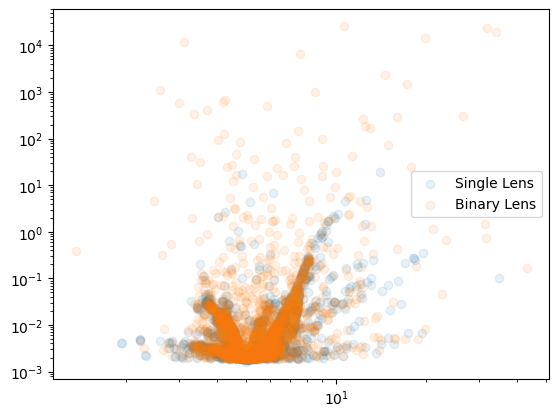

In [39]:
plt.scatter(all_params[:, 1][labels==0], all_params[:, -1][labels==0],alpha=0.1, label='Single Lens')
plt.scatter(all_params[:, 1][labels==2], all_params[:, -1][labels==2],alpha=0.1, label='Planetary System Lens')

plt.legend()
plt.yscale('log')
plt.xscale('log')

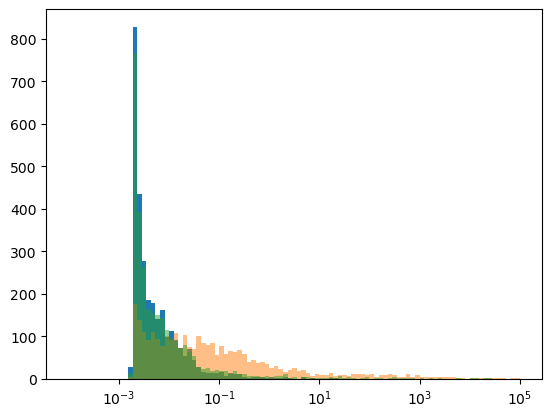

In [12]:
plt.hist(all_params[:, -1][labels==0], bins=np.logspace(np.log10(1e-4),np.log10(1e5), 100))
plt.hist(all_params[:, -1][labels==1], bins=np.logspace(np.log10(1e-4),np.log10(1e5), 100), alpha=0.5)
plt.hist(all_params[:, -1][labels==2], bins=np.logspace(np.log10(1e-4),np.log10(1e5), 100), alpha=0.5)

plt.xscale('log')

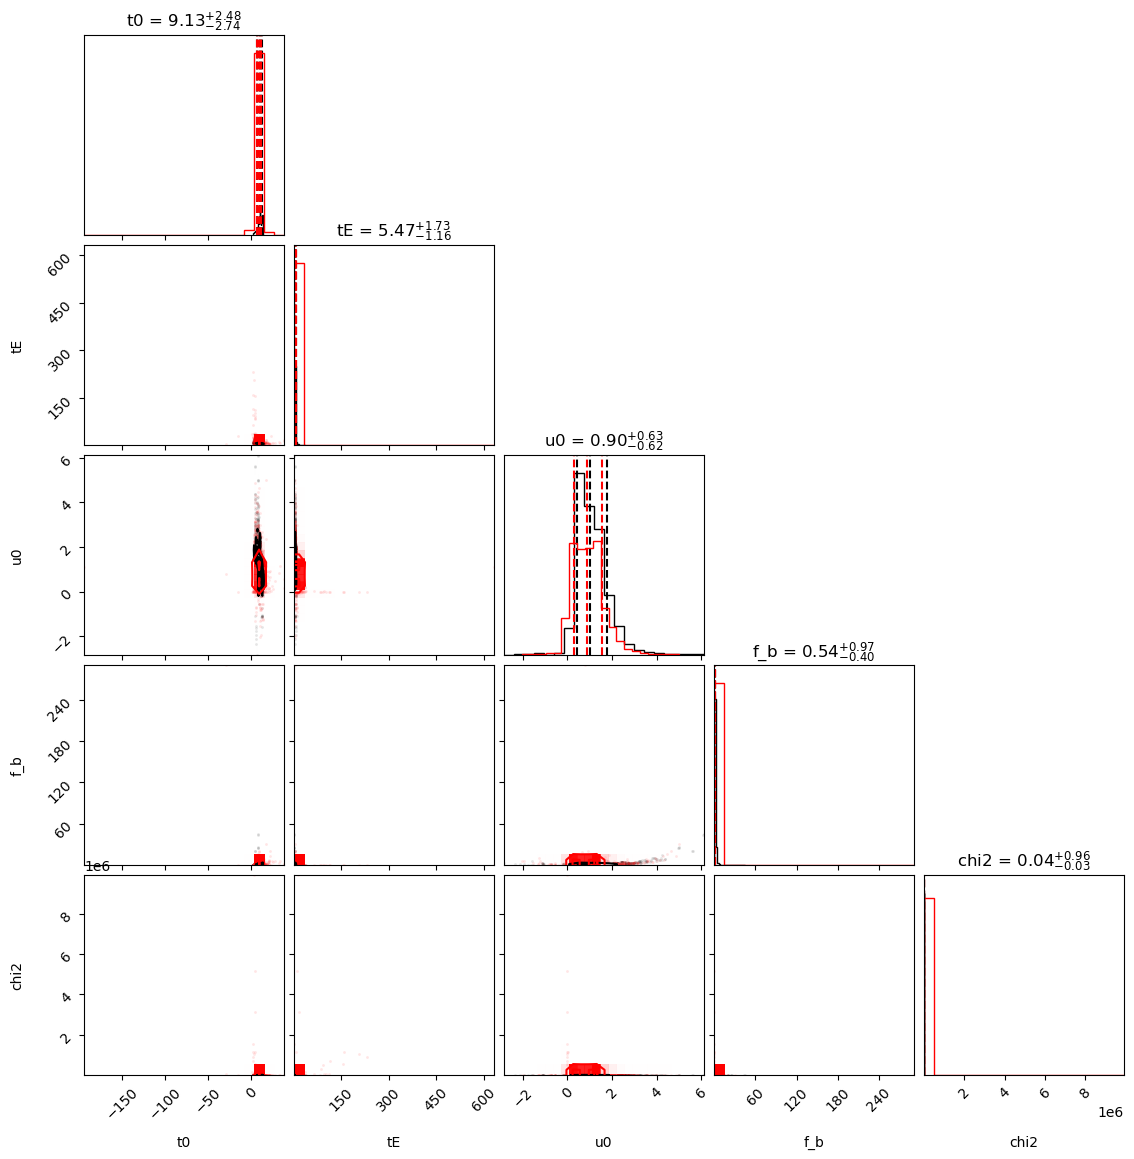

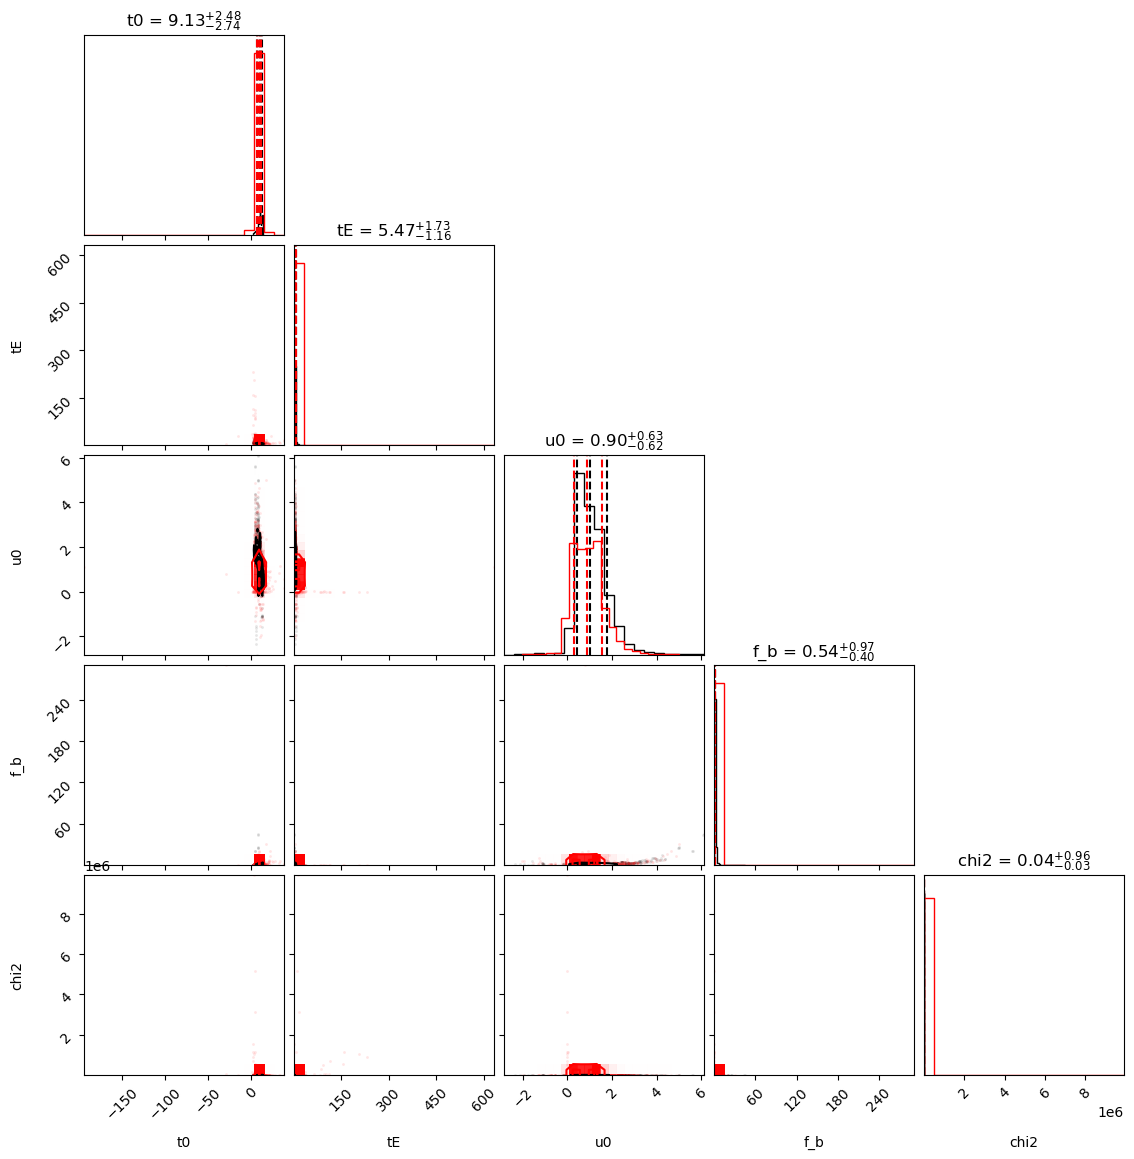

In [15]:
import corner
labels_ = ['t0','tE','u0', 'f_b', 'chi2']
scaler = StandardScaler()
# plot_data = scaler.fit_transform(all_params[:,,0])
figure = corner.corner(all_params[:,:][labels==0], 
                       labels=labels_,
                       quantiles=(0.16,0.5,  0.84),
                      show_titles=True,
                       color='black',
                        title_kwargs={"fontsize": 12})
corner.corner(all_params[:,:][labels==1], 
                       labels=labels_,
                       quantiles=(0.16,0.5,  0.84),
                      show_titles=True,
                       color='red',
                        fig=figure,
                        title_kwargs={"fontsize": 12})